In [1]:
import pandas as pd

In [2]:
# Remove max row limit
pd.set_option('display.max_rows', None)

# BC

In [3]:
bc_data = pd.read_csv('Solicitud_Historica/Historico_bc.csv', sep=';', header=None)

In [4]:
# Concat the two first rows to create the header
new_header = bc_data.iloc[0].astype(str) + '__' + bc_data.iloc[1].astype(str)
bc_data = bc_data[3:]  # Remove the first two rows
bc_data.columns = new_header
# Rename first column to 'Fecha_Hora'
bc_data.rename(columns={bc_data.columns[0]: 'Fecha_Hora'}, inplace=True)
bc_data.reset_index(drop=True, inplace=True)

In [5]:
bc_data.head()

,Fecha_Hora,CEN-TRAF__BC6,CEN-TRAF__BC_Biomasa,CEN-TRAF__BC_Combustibles,ITA-CJUS__BC6,ITA-CJUS__BC_Biomasa,ITA-CJUS__BC_Combustibles,BAR-PDLA__BC6,BAR-PDLA__BC_Biomasa,BAR-PDLA__BC_Combustibles
0,30/10/2019 16:00,"7741,666667","233,3523333","7508,313333",NaN,NaN,NaN,NaN,NaN,NaN
1,30/10/2019 17:00,"10137,42373","252,1705763","9885,255763",NaN,NaN,NaN,NaN,NaN,NaN
2,30/10/2019 18:00,"9959,616667","205,3701333","9754,245667",NaN,NaN,NaN,NaN,NaN,NaN
3,30/10/2019 19:00,"8458,666667","303,5217167","8155,143833",NaN,NaN,NaN,NaN,NaN,NaN
4,30/10/2019 20:00,"6161,966102","205,9094746","5956,056949",NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
bc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45344 entries, 0 to 45343
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Fecha_Hora                 45344 non-null  object
 1   CEN-TRAF__BC6              43714 non-null  object
 2   CEN-TRAF__BC_Biomasa       43661 non-null  object
 3   CEN-TRAF__BC_Combustibles  43714 non-null  object
 4   ITA-CJUS__BC6              12613 non-null  object
 5   ITA-CJUS__BC_Biomasa       12611 non-null  object
 6   ITA-CJUS__BC_Combustibles  12616 non-null  object
 7   BAR-PDLA__BC6              11054 non-null  object
 8   BAR-PDLA__BC_Biomasa       11043 non-null  object
 9   BAR-PDLA__BC_Combustibles  11053 non-null  object
dtypes: object(10)
memory usage: 3.5+ MB


# Meteorología

In [3]:
meteo_data = pd.read_csv('Solicitud_Historica/Historico_meteo.csv', sep=';', header=None)

/tmp/ipykernel_1032016/2268127859.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,9,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,51,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146) have mixed types. Specify dtype option on import or set low_memory=False.
  meteo_data = pd.read_csv('Solicitud_Historica/Historico_meteo.csv', sep=';', header=None)


In [4]:
meteo_data.head()

,0,1,2,3,4,5,6,7,8,9,...,137,138,139,140,141,142,143,144,145,146
0,est,BAR-PDLA,BAR-PDLA,BAR-PDLA,BAR-PDLA,BAR-PDLA,BAR-PDLA,BAR-PDLA,BEL-USBV,BEL-USBV,...,V-GIR-EPM,V-GIR-EPM,V-GIR-EPM,V-ITA-CONC,V-ITA-CONC,V-ITA-CONC,V-ITA-CONC,V-ITA-CONC,V-ITA-CONC,V-ITA-CONC
1,NaN,DViento_SSR,HAire10_SSR,PLiquida_SSR,P_SSR,RGlobal_SSR,TAire10_SSR,VViento_SSR,DViento_SSR,HAire10_SSR,...,RGlobal_SSR,TAire10_SSR,VViento_SSR,DViento_SSR,HAire10_SSR,PLiquida_SSR,P_SSR,RGlobal_SSR,TAire10_SSR,VViento_SSR
2,1/01/2014 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"139,377","83,0744",...,NaN,NaN,NaN,"268,705","82,4096",0,"618,046","13,44","17,6846","0,667655"
3,1/01/2014 1:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"145,137","85,0796",...,NaN,NaN,NaN,"225,005","81,5954",0,"617,977","13,44","17,8654","0,176705"
4,1/01/2014 2:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"217,499","87,5447",...,NaN,NaN,NaN,"243,241","83,9797",0,"617,368","13,44","17,8578","0,229255"


In [5]:
# Concatenate the first two rows to create the header
new_header_meteo = meteo_data.iloc[0].astype(str) + '__' + meteo_data.iloc[1].astype(str)
meteo_data = meteo_data[3:]  # Remove the first two rows
meteo_data.columns = new_header_meteo
# Rename first column to 'Fecha_Hora'
meteo_data.rename(columns={meteo_data.columns[0]: 'Fecha_Hora'}, inplace=True)
meteo_data.reset_index(drop=True, inplace=True)

In [7]:
meteo_data_datetime = meteo_data.copy()
meteo_data_datetime['Fecha_Hora'] = pd.to_datetime(meteo_data_datetime['Fecha_Hora'], format='%d/%m/%Y %H:%M')

In [8]:
meteo_data_datetime = meteo_data_datetime[meteo_data_datetime['Fecha_Hora']>=pd.Timestamp('2019-01-01')]

In [9]:
meteo_data_datetime.head()

,Fecha_Hora,BAR-PDLA__DViento_SSR,BAR-PDLA__HAire10_SSR,BAR-PDLA__PLiquida_SSR,BAR-PDLA__P_SSR,BAR-PDLA__RGlobal_SSR,BAR-PDLA__TAire10_SSR,BAR-PDLA__VViento_SSR,BEL-USBV__DViento_SSR,BEL-USBV__HAire10_SSR,...,V-GIR-EPM__RGlobal_SSR,V-GIR-EPM__TAire10_SSR,V-GIR-EPM__VViento_SSR,V-ITA-CONC__DViento_SSR,V-ITA-CONC__HAire10_SSR,V-ITA-CONC__PLiquida_SSR,V-ITA-CONC__P_SSR,V-ITA-CONC__RGlobal_SSR,V-ITA-CONC__TAire10_SSR,V-ITA-CONC__VViento_SSR
43823,2019-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"238,021","73,8289",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43824,2019-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"228,52","78,0382",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43825,2019-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"228,798","77,8565",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43826,2019-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"229,85","79,0222",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43827,2019-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"229,38","79,1101",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
meteo_data_datetime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52608 entries, 43823 to 96430
Columns: 147 entries, Fecha_Hora to V-ITA-CONC__VViento_SSR
dtypes: datetime64[ns](1), object(146)
memory usage: 59.4+ MB


In [11]:
meteo_data_datetime.isnull().sum()

Fecha_Hora                      0
BAR-PDLA__DViento_SSR       34800
BAR-PDLA__HAire10_SSR       36093
BAR-PDLA__PLiquida_SSR      34800
BAR-PDLA__P_SSR             36023
BAR-PDLA__RGlobal_SSR       52608
BAR-PDLA__TAire10_SSR       36035
BAR-PDLA__VViento_SSR       34800
BEL-USBV__DViento_SSR        2342
BEL-USBV__HAire10_SSR       12190
BEL-USBV__P_SSR              2175
BEL-USBV__RGlobal_SSR        2175
BEL-USBV__TAire10_SSR        2175
BEL-USBV__VViento_SSR        2175
CAL-LASA__DViento_SSR       34528
CAL-LASA__HAire10_SSR       34545
CAL-LASA__PLiquida_SSR      52608
CAL-LASA__P_SSR             34669
CAL-LASA__RGlobal_SSR       40813
CAL-LASA__TAire10_SSR       34545
CAL-LASA__VViento_SSR       34528
CEN-TRAF__DViento_SSR       34862
CEN-TRAF__HAire10_SSR       35028
CEN-TRAF__PLiquida_SSR      34862
CEN-TRAF__P_SSR             34967
CEN-TRAF__RGlobal_SSR       52608
CEN-TRAF__TAire10_SSR       34968
CEN-TRAF__VViento_SSR       34862
COP-CVID__DViento_SSR       34800
COP-CVID__HAir

In [12]:
# Show number of nulls in each column as a percentage of the total rows
meteo_data_datetime.isnull().mean() * 100

Fecha_Hora                    0.000000
BAR-PDLA__DViento_SSR        66.149635
BAR-PDLA__HAire10_SSR        68.607436
BAR-PDLA__PLiquida_SSR       66.149635
BAR-PDLA__P_SSR              68.474377
BAR-PDLA__RGlobal_SSR       100.000000
BAR-PDLA__TAire10_SSR        68.497187
BAR-PDLA__VViento_SSR        66.149635
BEL-USBV__DViento_SSR         4.451794
BEL-USBV__HAire10_SSR        23.171381
BEL-USBV__P_SSR               4.134352
BEL-USBV__RGlobal_SSR         4.134352
BEL-USBV__TAire10_SSR         4.134352
BEL-USBV__VViento_SSR         4.134352
CAL-LASA__DViento_SSR        65.632603
CAL-LASA__HAire10_SSR        65.664918
CAL-LASA__PLiquida_SSR      100.000000
CAL-LASA__P_SSR              65.900623
CAL-LASA__RGlobal_SSR        77.579456
CAL-LASA__TAire10_SSR        65.664918
CAL-LASA__VViento_SSR        65.632603
CEN-TRAF__DViento_SSR        66.267488
CEN-TRAF__HAire10_SSR        66.583029
CEN-TRAF__PLiquida_SSR       66.267488
CEN-TRAF__P_SSR              66.467077
CEN-TRAF__RGlobal_SSR    

In [13]:
# Drop all the columns with more than 10% of null values
meteo_data_datetime = meteo_data_datetime.loc[:, meteo_data_datetime.isnull().mean() < 0.1]

In [14]:
meteo_data_datetime.isnull().mean() * 100

Fecha_Hora               0.000000
BEL-USBV__DViento_SSR    4.451794
BEL-USBV__P_SSR          4.134352
BEL-USBV__RGlobal_SSR    4.134352
BEL-USBV__TAire10_SSR    4.134352
BEL-USBV__VViento_SSR    4.134352
ITA-CJUS__DViento_SSR    3.721867
ITA-CJUS__HAire10_SSR    3.527981
ITA-CJUS__P_SSR          3.527981
ITA-CJUS__RGlobal_SSR    3.664842
ITA-CJUS__TAire10_SSR    3.527981
ITA-CJUS__VViento_SSR    3.527981
dtype: float64

In [19]:
meteo_data_datetime[[col for col in meteo_data_datetime.columns if col.startswith('BEL-USBV')]].head()

,BEL-USBV__DViento_SSR,BEL-USBV__P_SSR,BEL-USBV__RGlobal_SSR,BEL-USBV__TAire10_SSR,BEL-USBV__VViento_SSR
43823,238.021,638.151,0.0,16.9139,1.70541
43824,228.520,637.776,0.0,15.9597,1.54506
43825,228.798,637.315,0.0,15.3926,1.67008
43826,229.850,636.847,0.0,14.8924,1.56168
43827,229.380,636.912,0.0,14.6778,1.69733


In [18]:
# Convert all columns to float, except 'Fecha_Hora', take into account that the decimal separator is a comma
for col in meteo_data_datetime.columns:
    if col != 'Fecha_Hora':
        meteo_data_datetime[col] = meteo_data_datetime[col].str.replace(',', '.', regex=False).astype(float)

In [21]:
meteo_data_datetime['BEL-USBV__VViento_SSR'].sort_values(ascending=True).head(20)

77023    0.0
76689    0.0
76658    0.0
76784    0.0
76777    0.0
76903    0.0
76905    0.0
76848    0.0
77044    0.0
77046    0.0
76688    0.0
93328    0.0
77301    0.0
77215    0.0
77184    0.0
77186    0.0
46325    0.0
77329    0.0
77331    0.0
77312    0.0
Name: BEL-USBV__VViento_SSR, dtype: float64

In [22]:
# Show data types of each column
meteo_data_datetime.dtypes

Fecha_Hora               datetime64[ns]
BEL-USBV__DViento_SSR           float64
BEL-USBV__P_SSR                 float64
BEL-USBV__RGlobal_SSR           float64
BEL-USBV__TAire10_SSR           float64
BEL-USBV__VViento_SSR           float64
ITA-CJUS__DViento_SSR           float64
ITA-CJUS__HAire10_SSR           float64
ITA-CJUS__P_SSR                 float64
ITA-CJUS__RGlobal_SSR           float64
ITA-CJUS__TAire10_SSR           float64
ITA-CJUS__VViento_SSR           float64
dtype: object

<Axes: >

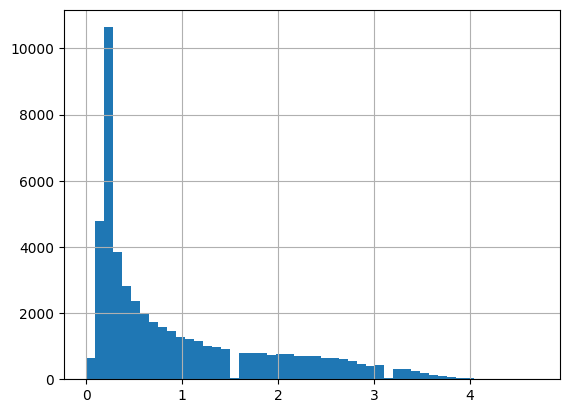

In [23]:
# Plot histogram of BEL-USBV__VViento_SSR
meteo_data_datetime['BEL-USBV__VViento_SSR'].astype(float).hist(bins=50)

In [24]:
# Export cleaned meteorological data to csv
meteo_data_datetime.to_csv('meteo_data_filtered.csv', index=False, sep=';')

# O3

In [25]:
o3_data = pd.read_csv('Solicitud_Historica/Historico_o3.csv', sep=';')

In [26]:
o3_data.head()

,Unnamed: 0,BAR-PDLA,GIR-SOSN,GIR-EPM,BEL-USBV,MED-PBLQ,MED-FISC,MED-UNNV,MED-UDEM,MED-MIRA,MED-ALTA,MED-CES,MED-LAYE,ITA-CONC,CAL-LASA
0,1/1/14 00:00,12.752629,NaN,NaN,9.809715,NaN,NaN,5.885829,3.727692,NaN,NaN,NaN,NaN,3.923886,5.885829
1,1/1/14 01:00,15.499349,NaN,NaN,3.923886,NaN,NaN,9.809715,3.923886,NaN,NaN,NaN,NaN,1.961943,5.885829
2,1/1/14 02:00,11.967852,NaN,NaN,5.885829,NaN,NaN,5.885829,4.708663,NaN,NaN,NaN,NaN,1.961943,5.885829
3,1/1/14 03:00,10.202103,NaN,NaN,9.809715,NaN,NaN,9.809715,3.923886,NaN,NaN,NaN,NaN,5.885829,7.847772
4,1/1/14 04:00,10.986881,NaN,NaN,5.885829,NaN,NaN,5.885829,4.120080,NaN,NaN,NaN,NaN,1.961943,7.847772


In [27]:
# Add an 'O3' suffix to all columns except 'Fecha_Hora'
o3_data = o3_data.rename(columns={col: col + '__O3' for col in o3_data.columns if col != 'Fecha_Hora'})

In [28]:
# Rename the first column to 'Fecha_Hora'
o3_data.rename(columns={o3_data.columns[0]: 'Fecha_Hora'}, inplace=True)

In [29]:
o3_data_datetime = o3_data.copy()
o3_data_datetime['Fecha_Hora'] = pd.to_datetime(o3_data_datetime['Fecha_Hora'], format='%d/%m/%y %H:%M')
o3_data_datetime = o3_data_datetime[o3_data_datetime['Fecha_Hora']>=pd.Timestamp('2019-01-01')]

In [30]:
o3_data_datetime.isnull().mean() * 100

Fecha_Hora       0.000000
BAR-PDLA__O3     5.649331
GIR-SOSN__O3    71.960538
GIR-EPM__O3     36.709246
BEL-USBV__O3     2.691606
MED-PBLQ__O3    64.347628
MED-FISC__O3    25.399179
MED-UNNV__O3    82.036953
MED-UDEM__O3    13.123479
MED-MIRA__O3     5.679745
MED-ALTA__O3    98.996350
MED-CES__O3     88.659519
MED-LAYE__O3    17.290146
ITA-CONC__O3     7.839112
CAL-LASA__O3    46.899711
dtype: float64

In [31]:
# Drop all the columns with more than 10% of null values
o3_data_datetime = o3_data_datetime.loc[:, o3_data_datetime.isnull().mean() < 0.2]

In [32]:
o3_data_datetime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52608 entries, 43824 to 96431
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Fecha_Hora    52608 non-null  datetime64[ns]
 1   BAR-PDLA__O3  49636 non-null  float64       
 2   BEL-USBV__O3  51192 non-null  float64       
 3   MED-UDEM__O3  45704 non-null  float64       
 4   MED-MIRA__O3  49620 non-null  float64       
 5   MED-LAYE__O3  43512 non-null  float64       
 6   ITA-CONC__O3  48484 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 3.2 MB


<Axes: >

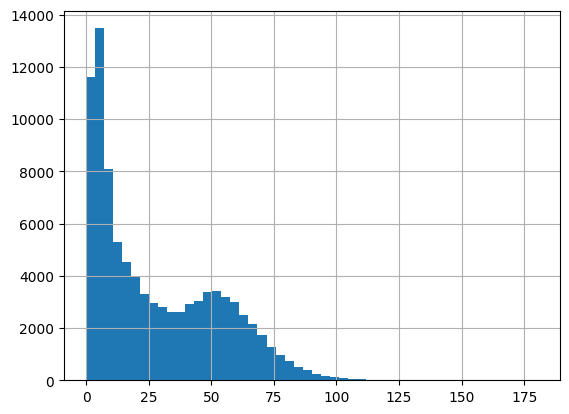

In [33]:
# Plot the histogram of the second column
o3_data[o3_data.columns[1]].hist(bins=50)

In [34]:
# Export O3 data to csv
o3_data_datetime.to_csv('Solicitud_Historica/Historico_o3_filtered.csv', index=False, sep=';')

# PM10

In [35]:
pm10_data = pd.read_csv('Solicitud_Historica/Historico_pm10.csv', sep=';')

In [36]:
# Rename first column to 'Fecha_Hora'
pm10_data.rename(columns={pm10_data.columns[0]: 'Fecha_Hora'}, inplace=True)

In [37]:
# Convert 'Fecha_Hora' to datetime
pm10_data['Fecha_Hora'] = pd.to_datetime(pm10_data['Fecha_Hora'], format='%Y-%m-%d %H:%M:%S')

In [38]:
pm10_data = pm10_data[pm10_data['Fecha_Hora']>=pd.Timestamp('2019-01-01')]

In [39]:
pm10_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52608 entries, 43824 to 96431
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Fecha_Hora  52608 non-null  datetime64[ns]
 1   GIR-IECO    16256 non-null  float64       
 2   GIR-EPM     29679 non-null  float64       
 3   BEL-USBV    50466 non-null  float64       
 4   MED-UNFM    0 non-null      float64       
 5   MED-ITMR    35880 non-null  float64       
 6   CEN-TRAF    49540 non-null  float64       
 7   MED-EXSA    50309 non-null  float64       
 8   MED-PROV    8512 non-null   float64       
 9   MED-ALTA    13790 non-null  float64       
 10  MED-PJIC    50112 non-null  float64       
 11  ITA-POGO    51237 non-null  float64       
 12  ITA-CRSV    0 non-null      float64       
 13  ITA-CONC    48361 non-null  float64       
 14  SUR-TRAF    19815 non-null  float64       
 15  CAL-JOAR    0 non-null      float64       
 16  CAL-PMER    0 non-null 

In [40]:
pm10_data.head()

,Fecha_Hora,GIR-IECO,GIR-EPM,BEL-USBV,MED-UNFM,MED-ITMR,CEN-TRAF,MED-EXSA,MED-PROV,MED-ALTA,MED-PJIC,ITA-POGO,ITA-CRSV,ITA-CONC,SUR-TRAF,CAL-JOAR,CAL-PMER
43824,2019-01-01 00:00:00,137.0,NaN,37.0,NaN,109.0,128.0,114.0,NaN,NaN,40.0,139.0,NaN,105.0,NaN,NaN,NaN
43825,2019-01-01 01:00:00,91.0,NaN,42.0,NaN,107.0,94.0,104.0,NaN,NaN,70.0,137.0,NaN,103.0,NaN,NaN,NaN
43826,2019-01-01 02:00:00,87.0,NaN,49.0,NaN,88.0,86.0,78.0,NaN,NaN,61.0,147.0,NaN,64.0,89.0466,NaN,NaN
43827,2019-01-01 03:00:00,80.0,NaN,46.0,NaN,81.0,81.0,83.0,NaN,NaN,49.0,121.0,NaN,56.0,NaN,NaN,NaN
43828,2019-01-01 04:00:00,73.0,NaN,32.0,NaN,70.0,78.0,71.0,NaN,NaN,60.0,115.0,NaN,64.0,NaN,NaN,NaN


In [41]:
# Drop columns with more than 10% of null values
pm10_data = pm10_data.loc[:, pm10_data.isnull().mean() < 0.1]

In [42]:
pm10_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52608 entries, 43824 to 96431
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Fecha_Hora  52608 non-null  datetime64[ns]
 1   BEL-USBV    50466 non-null  float64       
 2   CEN-TRAF    49540 non-null  float64       
 3   MED-EXSA    50309 non-null  float64       
 4   MED-PJIC    50112 non-null  float64       
 5   ITA-POGO    51237 non-null  float64       
 6   ITA-CONC    48361 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 3.2 MB


In [43]:
# Add a PM10 suffix to all columns except 'Fecha_Hora'
pm10_data = pm10_data.rename(columns={col: col + '__PM10' for col in pm10_data.columns if col != 'Fecha_Hora'})

In [44]:
# Export cleaned PM10 data to csv
pm10_data.to_csv('Solicitud_Historica/Historico_pm10_filtered.csv', index=False, sep=';')

# PM2.5

In [45]:
pm25_data = pd.read_csv('Solicitud_Historica/Historico_pm25.csv', sep=';')

In [46]:
pm25_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96432 entries, 0 to 96431
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  96432 non-null  object 
 1   BAR-TORR    59869 non-null  float64
 2   GIR-SOSN    44056 non-null  float64
 3   GIR-EPM     34004 non-null  float64
 4   COP-CVID    61656 non-null  float64
 5   BEL-FEVE    60207 non-null  float64
 6   MED-ARAN    61254 non-null  float64
 7   MED-PBLQ    22670 non-null  float64
 8   MED-SCRI    60870 non-null  float64
 9   MED-FISC    40065 non-null  float64
 10  MED-UNNV    51436 non-null  float64
 11  MED-VILL    61254 non-null  float64
 12  CEN-TRAF    89641 non-null  float64
 13  MED-BEME    61423 non-null  float64
 14  MED-SELE    47933 non-null  float64
 15  MED-PROV    10122 non-null  float64
 16  MED-ALTA    61482 non-null  float64
 17  MED-CES     5912 non-null   float64
 18  MED-TESO    60862 non-null  float64
 19  ITA-CJUS    91991 non-nul

In [47]:
# Rename first column to 'Fecha_Hora'
pm25_data.rename(columns={pm25_data.columns[0]: 'Fecha_Hora'}, inplace=True)

In [48]:
pm25_data.head()

,Fecha_Hora,BAR-TORR,GIR-SOSN,GIR-EPM,COP-CVID,BEL-FEVE,MED-ARAN,MED-PBLQ,MED-SCRI,MED-FISC,...,ITA-CJUS,MED-LAYE,ITA-CONC,ENV-HOSP,EST-HOSP,SUR-TRAF,SAB-RAME,EST-TABL,CAL-LASA,CAL-JOAR
0,1/1/14 00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,108.0,NaN,137.0,NaN,NaN,NaN,NaN,NaN,186.0,NaN
1,1/1/14 01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,64.0,NaN,100.0,NaN,NaN,NaN,NaN,NaN,90.0,NaN
2,1/1/14 02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,NaN,90.0,NaN,NaN,NaN,NaN,NaN,74.0,NaN
3,1/1/14 03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,52.0,NaN,70.0,NaN,NaN,NaN,NaN,NaN,57.0,NaN
4,1/1/14 04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,38.0,NaN,59.0,NaN,NaN,NaN,NaN,NaN,46.0,NaN


In [49]:
# Convert 'Fecha_Hora' to datetime
pm25_data['Fecha_Hora'] = pd.to_datetime(pm25_data['Fecha_Hora'], format='%d/%m/%y %H:%M')

In [50]:
pm25_data = pm25_data[pm25_data['Fecha_Hora']>=pd.Timestamp('2019-01-01')]

In [51]:
pm25_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52608 entries, 43824 to 96431
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Fecha_Hora  52608 non-null  datetime64[ns]
 1   BAR-TORR    49250 non-null  float64       
 2   GIR-SOSN    16804 non-null  float64       
 3   GIR-EPM     34004 non-null  float64       
 4   COP-CVID    50965 non-null  float64       
 5   BEL-FEVE    50181 non-null  float64       
 6   MED-ARAN    50655 non-null  float64       
 7   MED-PBLQ    22670 non-null  float64       
 8   MED-SCRI    50304 non-null  float64       
 9   MED-FISC    40065 non-null  float64       
 10  MED-UNNV    9810 non-null   float64       
 11  MED-VILL    50039 non-null  float64       
 12  CEN-TRAF    49896 non-null  float64       
 13  MED-BEME    50916 non-null  float64       
 14  MED-SELE    47933 non-null  float64       
 15  MED-PROV    10122 non-null  float64       
 16  MED-ALTA    50015 non-n

In [52]:
pm25_data.isnull().mean() * 100

Fecha_Hora     0.000000
BAR-TORR       6.383060
GIR-SOSN      68.058090
GIR-EPM       35.363443
COP-CVID       3.123099
BEL-FEVE       4.613367
MED-ARAN       3.712363
MED-PBLQ      56.907695
MED-SCRI       4.379562
MED-FISC      23.842381
MED-UNNV      81.352646
MED-VILL       4.883288
CEN-TRAF       5.155109
MED-BEME       3.216241
MED-SELE       8.886481
MED-PROV      80.759580
MED-ALTA       4.928908
MED-CES       88.762165
MED-TESO       4.305429
ITA-CJUS       2.779045
MED-LAYE      14.986314
ITA-CONC       4.923206
ENV-HOSP       3.470955
EST-HOSP       2.400776
SUR-TRAF      37.269997
SAB-RAME       4.598160
EST-TABL      90.989964
CAL-LASA      45.620438
CAL-JOAR       4.130550
dtype: float64

In [53]:
# Drop all the columns with more than 15% of null values
pm25_data = pm25_data.loc[:, pm25_data.isnull().mean() < 0.15]

In [54]:
pm25_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52608 entries, 43824 to 96431
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Fecha_Hora  52608 non-null  datetime64[ns]
 1   BAR-TORR    49250 non-null  float64       
 2   COP-CVID    50965 non-null  float64       
 3   BEL-FEVE    50181 non-null  float64       
 4   MED-ARAN    50655 non-null  float64       
 5   MED-SCRI    50304 non-null  float64       
 6   MED-VILL    50039 non-null  float64       
 7   CEN-TRAF    49896 non-null  float64       
 8   MED-BEME    50916 non-null  float64       
 9   MED-SELE    47933 non-null  float64       
 10  MED-ALTA    50015 non-null  float64       
 11  MED-TESO    50343 non-null  float64       
 12  ITA-CJUS    51146 non-null  float64       
 13  MED-LAYE    44724 non-null  float64       
 14  ITA-CONC    50018 non-null  float64       
 15  ENV-HOSP    50782 non-null  float64       
 16  EST-HOSP    51345 non-n

In [55]:
# Add a 'PM2.5' suffix to all columns except 'Fecha_Hora'
pm25_data = pm25_data.rename(columns={col: col + '__PM2.5' for col in pm25_data.columns if col != 'Fecha_Hora'})

In [56]:
# Export PM2.5 data to csv
pm25_data.to_csv('Solicitud_Historica/Historico_pm25_filtered.csv', index=False, sep=';')

# Union de los datos

In [57]:
meteo_data_datetime.head()

,Fecha_Hora,BEL-USBV__DViento_SSR,BEL-USBV__P_SSR,BEL-USBV__RGlobal_SSR,BEL-USBV__TAire10_SSR,BEL-USBV__VViento_SSR,ITA-CJUS__DViento_SSR,ITA-CJUS__HAire10_SSR,ITA-CJUS__P_SSR,ITA-CJUS__RGlobal_SSR,ITA-CJUS__TAire10_SSR,ITA-CJUS__VViento_SSR
43823,2019-01-01 00:00:00,238.021,638.151,0.0,16.9139,1.70541,182.248,56.9499,634.559,0.0,19.5628,0.373759
43824,2019-01-01 01:00:00,228.520,637.776,0.0,15.9597,1.54506,170.824,59.6667,634.183,0.0,19.0364,0.380545
43825,2019-01-01 02:00:00,228.798,637.315,0.0,15.3926,1.67008,180.863,63.7678,633.785,0.0,18.2107,0.209423
43826,2019-01-01 03:00:00,229.850,636.847,0.0,14.8924,1.56168,194.199,66.2271,633.444,0.0,17.5893,0.344507
43827,2019-01-01 04:00:00,229.380,636.912,0.0,14.6778,1.69733,223.200,70.3917,633.410,0.0,16.7994,0.270756


In [58]:
o3_data_datetime.head()

,Fecha_Hora,BAR-PDLA__O3,BEL-USBV__O3,MED-UDEM__O3,MED-MIRA__O3,MED-LAYE__O3,ITA-CONC__O3
43824,2019-01-01 00:00:00,1.569554,21.603935,13.537406,NaN,24.720481,NaN
43825,2019-01-01 01:00:00,1.569554,18.929885,8.632549,NaN,18.442264,NaN
43826,2019-01-01 02:00:00,0.980971,17.288288,5.493440,NaN,25.309064,NaN
43827,2019-01-01 03:00:00,0.980971,16.823622,6.082023,NaN,17.853681,NaN
43828,2019-01-01 04:00:00,0.588583,20.489159,3.335303,NaN,21.581373,NaN


In [59]:
pm10_data.head()

,Fecha_Hora,BEL-USBV__PM10,CEN-TRAF__PM10,MED-EXSA__PM10,MED-PJIC__PM10,ITA-POGO__PM10,ITA-CONC__PM10
43824,2019-01-01 00:00:00,37.0,128.0,114.0,40.0,139.0,105.0
43825,2019-01-01 01:00:00,42.0,94.0,104.0,70.0,137.0,103.0
43826,2019-01-01 02:00:00,49.0,86.0,78.0,61.0,147.0,64.0
43827,2019-01-01 03:00:00,46.0,81.0,83.0,49.0,121.0,56.0
43828,2019-01-01 04:00:00,32.0,78.0,71.0,60.0,115.0,64.0


In [60]:
pm25_data.head()

,Fecha_Hora,BAR-TORR__PM2.5,COP-CVID__PM2.5,BEL-FEVE__PM2.5,MED-ARAN__PM2.5,MED-SCRI__PM2.5,MED-VILL__PM2.5,CEN-TRAF__PM2.5,MED-BEME__PM2.5,MED-SELE__PM2.5,MED-ALTA__PM2.5,MED-TESO__PM2.5,ITA-CJUS__PM2.5,MED-LAYE__PM2.5,ITA-CONC__PM2.5,ENV-HOSP__PM2.5,EST-HOSP__PM2.5,SAB-RAME__PM2.5,CAL-JOAR__PM2.5
43824,2019-01-01 00:00:00,93.6646,NaN,188.8740,198.4560,108.4140,57.8790,115.0,67.1179,NaN,77.0134,26.6834,171.0,17.0,79.0,44.5809,28.0,62.7140,NaN
43825,2019-01-01 01:00:00,50.3542,NaN,110.1980,134.0200,70.1561,49.1590,79.0,58.6878,NaN,36.6871,23.0106,198.0,22.0,74.0,44.5023,19.0,44.5194,NaN
43826,2019-01-01 02:00:00,35.0655,NaN,94.8215,83.9968,44.2872,59.9013,59.0,50.2286,NaN,39.0220,20.5705,160.0,11.0,56.0,44.4149,27.0,45.7275,NaN
43827,2019-01-01 03:00:00,29.1859,NaN,73.6579,59.0683,41.7584,74.1180,58.0,53.7066,NaN,36.6138,20.5436,155.0,22.0,37.0,41.9547,31.0,58.8523,31.6231
43828,2019-01-01 04:00:00,27.9737,NaN,44.3655,43.6580,25.7170,58.4576,63.0,39.3297,NaN,27.0872,19.2904,115.0,21.0,43.0,35.9086,22.0,85.0434,29.0643


In [61]:
# Join the four datasets on 'Fecha_Hora'
from functools import reduce
data_frames = [meteo_data_datetime, o3_data_datetime, pm10_data, pm25_data]
merged_data = reduce(lambda left, right: pd.merge(left, right, on='Fecha_Hora', how='inner'), data_frames)
merged_data.head()

,Fecha_Hora,BEL-USBV__DViento_SSR,BEL-USBV__P_SSR,BEL-USBV__RGlobal_SSR,BEL-USBV__TAire10_SSR,BEL-USBV__VViento_SSR,ITA-CJUS__DViento_SSR,ITA-CJUS__HAire10_SSR,ITA-CJUS__P_SSR,ITA-CJUS__RGlobal_SSR,...,MED-SELE__PM2.5,MED-ALTA__PM2.5,MED-TESO__PM2.5,ITA-CJUS__PM2.5,MED-LAYE__PM2.5,ITA-CONC__PM2.5,ENV-HOSP__PM2.5,EST-HOSP__PM2.5,SAB-RAME__PM2.5,CAL-JOAR__PM2.5
0,2019-01-01 00:00:00,238.021,638.151,0.0,16.9139,1.70541,182.248,56.9499,634.559,0.0,...,NaN,77.0134,26.6834,171.0,17.0,79.0,44.5809,28.0,62.7140,NaN
1,2019-01-01 01:00:00,228.520,637.776,0.0,15.9597,1.54506,170.824,59.6667,634.183,0.0,...,NaN,36.6871,23.0106,198.0,22.0,74.0,44.5023,19.0,44.5194,NaN
2,2019-01-01 02:00:00,228.798,637.315,0.0,15.3926,1.67008,180.863,63.7678,633.785,0.0,...,NaN,39.0220,20.5705,160.0,11.0,56.0,44.4149,27.0,45.7275,NaN
3,2019-01-01 03:00:00,229.850,636.847,0.0,14.8924,1.56168,194.199,66.2271,633.444,0.0,...,NaN,36.6138,20.5436,155.0,22.0,37.0,41.9547,31.0,58.8523,31.6231
4,2019-01-01 04:00:00,229.380,636.912,0.0,14.6778,1.69733,223.200,70.3917,633.410,0.0,...,NaN,27.0872,19.2904,115.0,21.0,43.0,35.9086,22.0,85.0434,29.0643


In [62]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52608 entries, 0 to 52607
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Fecha_Hora             52608 non-null  datetime64[ns]
 1   BEL-USBV__DViento_SSR  50266 non-null  float64       
 2   BEL-USBV__P_SSR        50433 non-null  float64       
 3   BEL-USBV__RGlobal_SSR  50433 non-null  float64       
 4   BEL-USBV__TAire10_SSR  50433 non-null  float64       
 5   BEL-USBV__VViento_SSR  50433 non-null  float64       
 6   ITA-CJUS__DViento_SSR  50650 non-null  float64       
 7   ITA-CJUS__HAire10_SSR  50752 non-null  float64       
 8   ITA-CJUS__P_SSR        50752 non-null  float64       
 9   ITA-CJUS__RGlobal_SSR  50680 non-null  float64       
 10  ITA-CJUS__TAire10_SSR  50752 non-null  float64       
 11  ITA-CJUS__VViento_SSR  50752 non-null  float64       
 12  BAR-PDLA__O3           49636 non-null  float64       
 13  B

In [63]:
# Export merged data to csv
merged_data.to_csv('siata_merged_data.csv', index=False, sep=';')